In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re

from ArapucaRoutineMainFunctions import *

In [1]:
#base_path = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304'
base_path = '/Users/bordoni/protoDUNE/XeDoping/testfiles'
file_path = os.path.join(base_path,'*.dat')

file_name_list =  glob.glob(file_path) 

file_name_list


NameError: name 'glob' is not defined

In [3]:
file_name_dict = [parse_file_name(base_path, f) for f in file_name_list]

AttributeError: 'NoneType' object has no attribute 'groupdict'

In [4]:
file_name_dict 
df_list = create_dataset_list(file_name_dict)
df_list[0].shape

loading files for channel  0
loading files for channel  1


(2991, 2024)

In [5]:
df_list = doPreProcessing(df_list)

preparing dataframe for channel :  1
preparing dataframe for channel :  2
done!
preprocessing done!


In [5]:
df_ch0 = df_list[0]

In [6]:
df_ch0.head()

,0,1,2,3,4,5,6,7,8,9,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11102.0,1.0,100076.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1546.0,1555.0,1554.0,1554.0,1556.0,1547.0,1551.0,1551.0,1555.0,1551.0
1,11102.0,1.0,100078.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1549.0,1549.0,1549.0,1545.0,1545.0,1549.0,1548.0,1543.0,1547.0,1551.0
2,11102.0,1.0,100080.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1550.0,1544.0,1552.0,1547.0,1542.0,1547.0,1547.0,1542.0,1539.0,1543.0
3,11102.0,1.0,100082.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1543.0,1545.0,1545.0,1548.0,1550.0,1549.0,1546.0,1546.0,1548.0,1546.0
4,11102.0,1.0,100084.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1544.0,1534.0,1545.0,1547.0,1546.0,1547.0,1549.0,1546.0,1546.0,1548.0


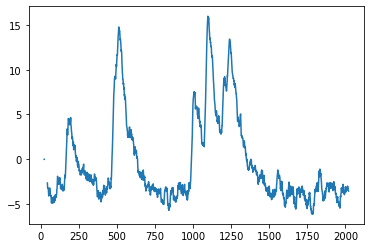

In [7]:
#df_ch0_raw = df_list[0]
df_ch0.iloc[470,rowin].plot()


In [8]:
df_ch0.head()

,evt number,Ch,0,1,2,3,4,5,6,7,...,2021,2022,2023,Saturated,Pedestal,hasSignal,n pe,pe height,pe width,pe area
0,0,0,11102.0,1.0,100076.0,304.0,48.0,0.0,132.0,0.0,...,5.10,5.35,5.30,False,1547.90,True,0.0,0.00,0.000000,0.00
1,1,0,11102.0,1.0,100078.0,304.0,48.0,0.0,132.0,0.0,...,-0.08,-0.23,0.07,False,1547.88,False,0.0,0.00,0.000000,0.00
2,2,0,11102.0,1.0,100080.0,304.0,48.0,0.0,132.0,0.0,...,-0.38,-0.68,-0.83,False,1546.48,True,1.0,22.27,78.077922,1300.26
3,3,0,11102.0,1.0,100082.0,304.0,48.0,0.0,132.0,0.0,...,-0.27,-0.67,-0.47,False,1547.67,False,0.0,0.00,0.000000,0.00
4,4,0,11102.0,1.0,100084.0,304.0,48.0,0.0,132.0,0.0,...,-1.07,-0.92,-0.62,False,1546.17,False,0.0,0.00,0.000000,0.00


In [6]:
good_pe_ch0 = df_ch0.loc[df_ch0['n pe'] > 0]

good_pe_ch0['pe height'].hist(bins=70)

NameError: name 'df_ch0' is not defined

In [10]:
rundir = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/rundir'
csvdir = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/csvdir'
df_allch = doEventSelection(df_list, rundir, csvdir)

Percentage of events passing the selection 0.31995987963891676


In [11]:
df_allch.head(20)

,evt number,Ch,0,1,2,3,4,5,6,7,...,Saturated,Pedestal,hasSignal,n pe,pe height,pe width,pe area,isSaturatedEvent,EventhasSignal,isGoodEvt
0,0,0,11102.0,1.0,100076.0,304.0,48.0,0.0,132.0,0.0,...,False,1547.90,True,0.0,0.00,0.000000,0.00,False,True,True
998,0,0,11102.0,1.0,39958.0,304.0,48.0,0.0,132.0,0.0,...,False,1547.96,True,0.0,0.00,0.000000,0.00,NaN,NaN,False
1994,0,0,11102.0,1.0,99901.0,304.0,48.0,0.0,132.0,0.0,...,False,1555.78,True,0.0,0.00,0.000000,0.00,NaN,NaN,False
0,0,1,11102.0,1.0,100076.0,304.0,48.0,1.0,133.0,0.0,...,False,1545.23,False,0.0,0.00,0.000000,0.00,False,True,True
998,0,1,11102.0,1.0,99901.0,304.0,48.0,1.0,133.0,0.0,...,False,1544.56,True,1.0,25.39,30.596639,692.35,NaN,NaN,False
1995,0,1,11102.0,1.0,39958.0,304.0,48.0,1.0,133.0,0.0,...,False,1544.64,True,1.0,10.46,55.000000,463.10,NaN,NaN,False
1,1,0,11102.0,1.0,100078.0,304.0,48.0,0.0,132.0,0.0,...,False,1547.88,False,0.0,0.00,0.000000,0.00,False,True,True
999,1,0,11102.0,1.0,39960.0,304.0,48.0,0.0,132.0,0.0,...,False,1547.34,True,1.0,16.51,36.166667,516.46,NaN,NaN,False
1995,1,0,11102.0,1.0,99903.0,304.0,48.0,0.0,132.0,0.0,...,False,1548.16,False,0.0,0.00,0.000000,0.00,NaN,NaN,False
1,1,1,11102.0,1.0,100078.0,304.0,48.0,1.0,133.0,0.0,...,False,1544.56,False,0.0,0.00,0.000000,0.00,False,True,True
